In [ ]:
from io import IncrementalNewlineDecoder
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json

In [ ]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

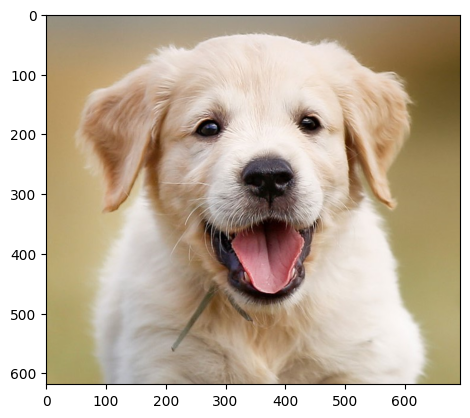

In [ ]:
image = Image.open('/content/dog.jpg')
plt.imshow(image)

In [ ]:
vgg = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 155MB/s]


In [ ]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
vgg.classifier[-1]

Linear(in_features=4096, out_features=1000, bias=True)

In [ ]:
CUDA = torch.cuda.is_available()
if CUDA:
  vgg = vgg.cuda()

In [ ]:
image = transform(image)

In [ ]:
print(image.shape)

torch.Size([3, 224, 224])


In [ ]:
image = image.unsqueeze(0)
print(image.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
image = Variable(image)
if CUDA:
  image = image.cuda()
print(image.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
output = vgg(image)

In [ ]:
print(output.shape)

torch.Size([1, 1000])


In [ ]:
output = output.squeeze(0)

In [ ]:
print(output.shape)

torch.Size([1000])


In [ ]:
labels = json.load(open('/content/imagenet_class_index.json'))

In [ ]:
index = output.max(0)
print(index)

torch.return_types.max(
values=tensor(17.2835, device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor(207, device='cuda:0'))


In [ ]:
print(index[1])

tensor(207, device='cuda:0')


In [ ]:
index = str(index[1].item())
label = labels[index][1]

In [ ]:
label

'golden_retriever'

In [ ]:
module_list = list(vgg.features.modules()) # modules() returns a generator, and wrapping list() converts the generator to list.
module_list

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (17): Conv2d(

In [ ]:
#print(vgg.features)
#print(module_list[0])
print(module_list[1])
print(module_list[2])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)


In [ ]:
outputs = []
names = []
for layer in module_list[1:]:
  image = layer(image)
  outputs.append(image)
  names.append(str(layer))

In [ ]:
for feature_map in outputs:
  print(feature_map.shape)


torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [ ]:
processed = []
for feature_map in outputs:
  feature_map = feature_map.squeeze(0)
  # convert the 3D tensor to 2D. Sum the same element of every channel
  gray_scale = torch.sum(feature_map, 0)
  gray_scale = gray_scale/feature_map.shape[0]
  processed.append(gray_scale.data.cpu().numpy())

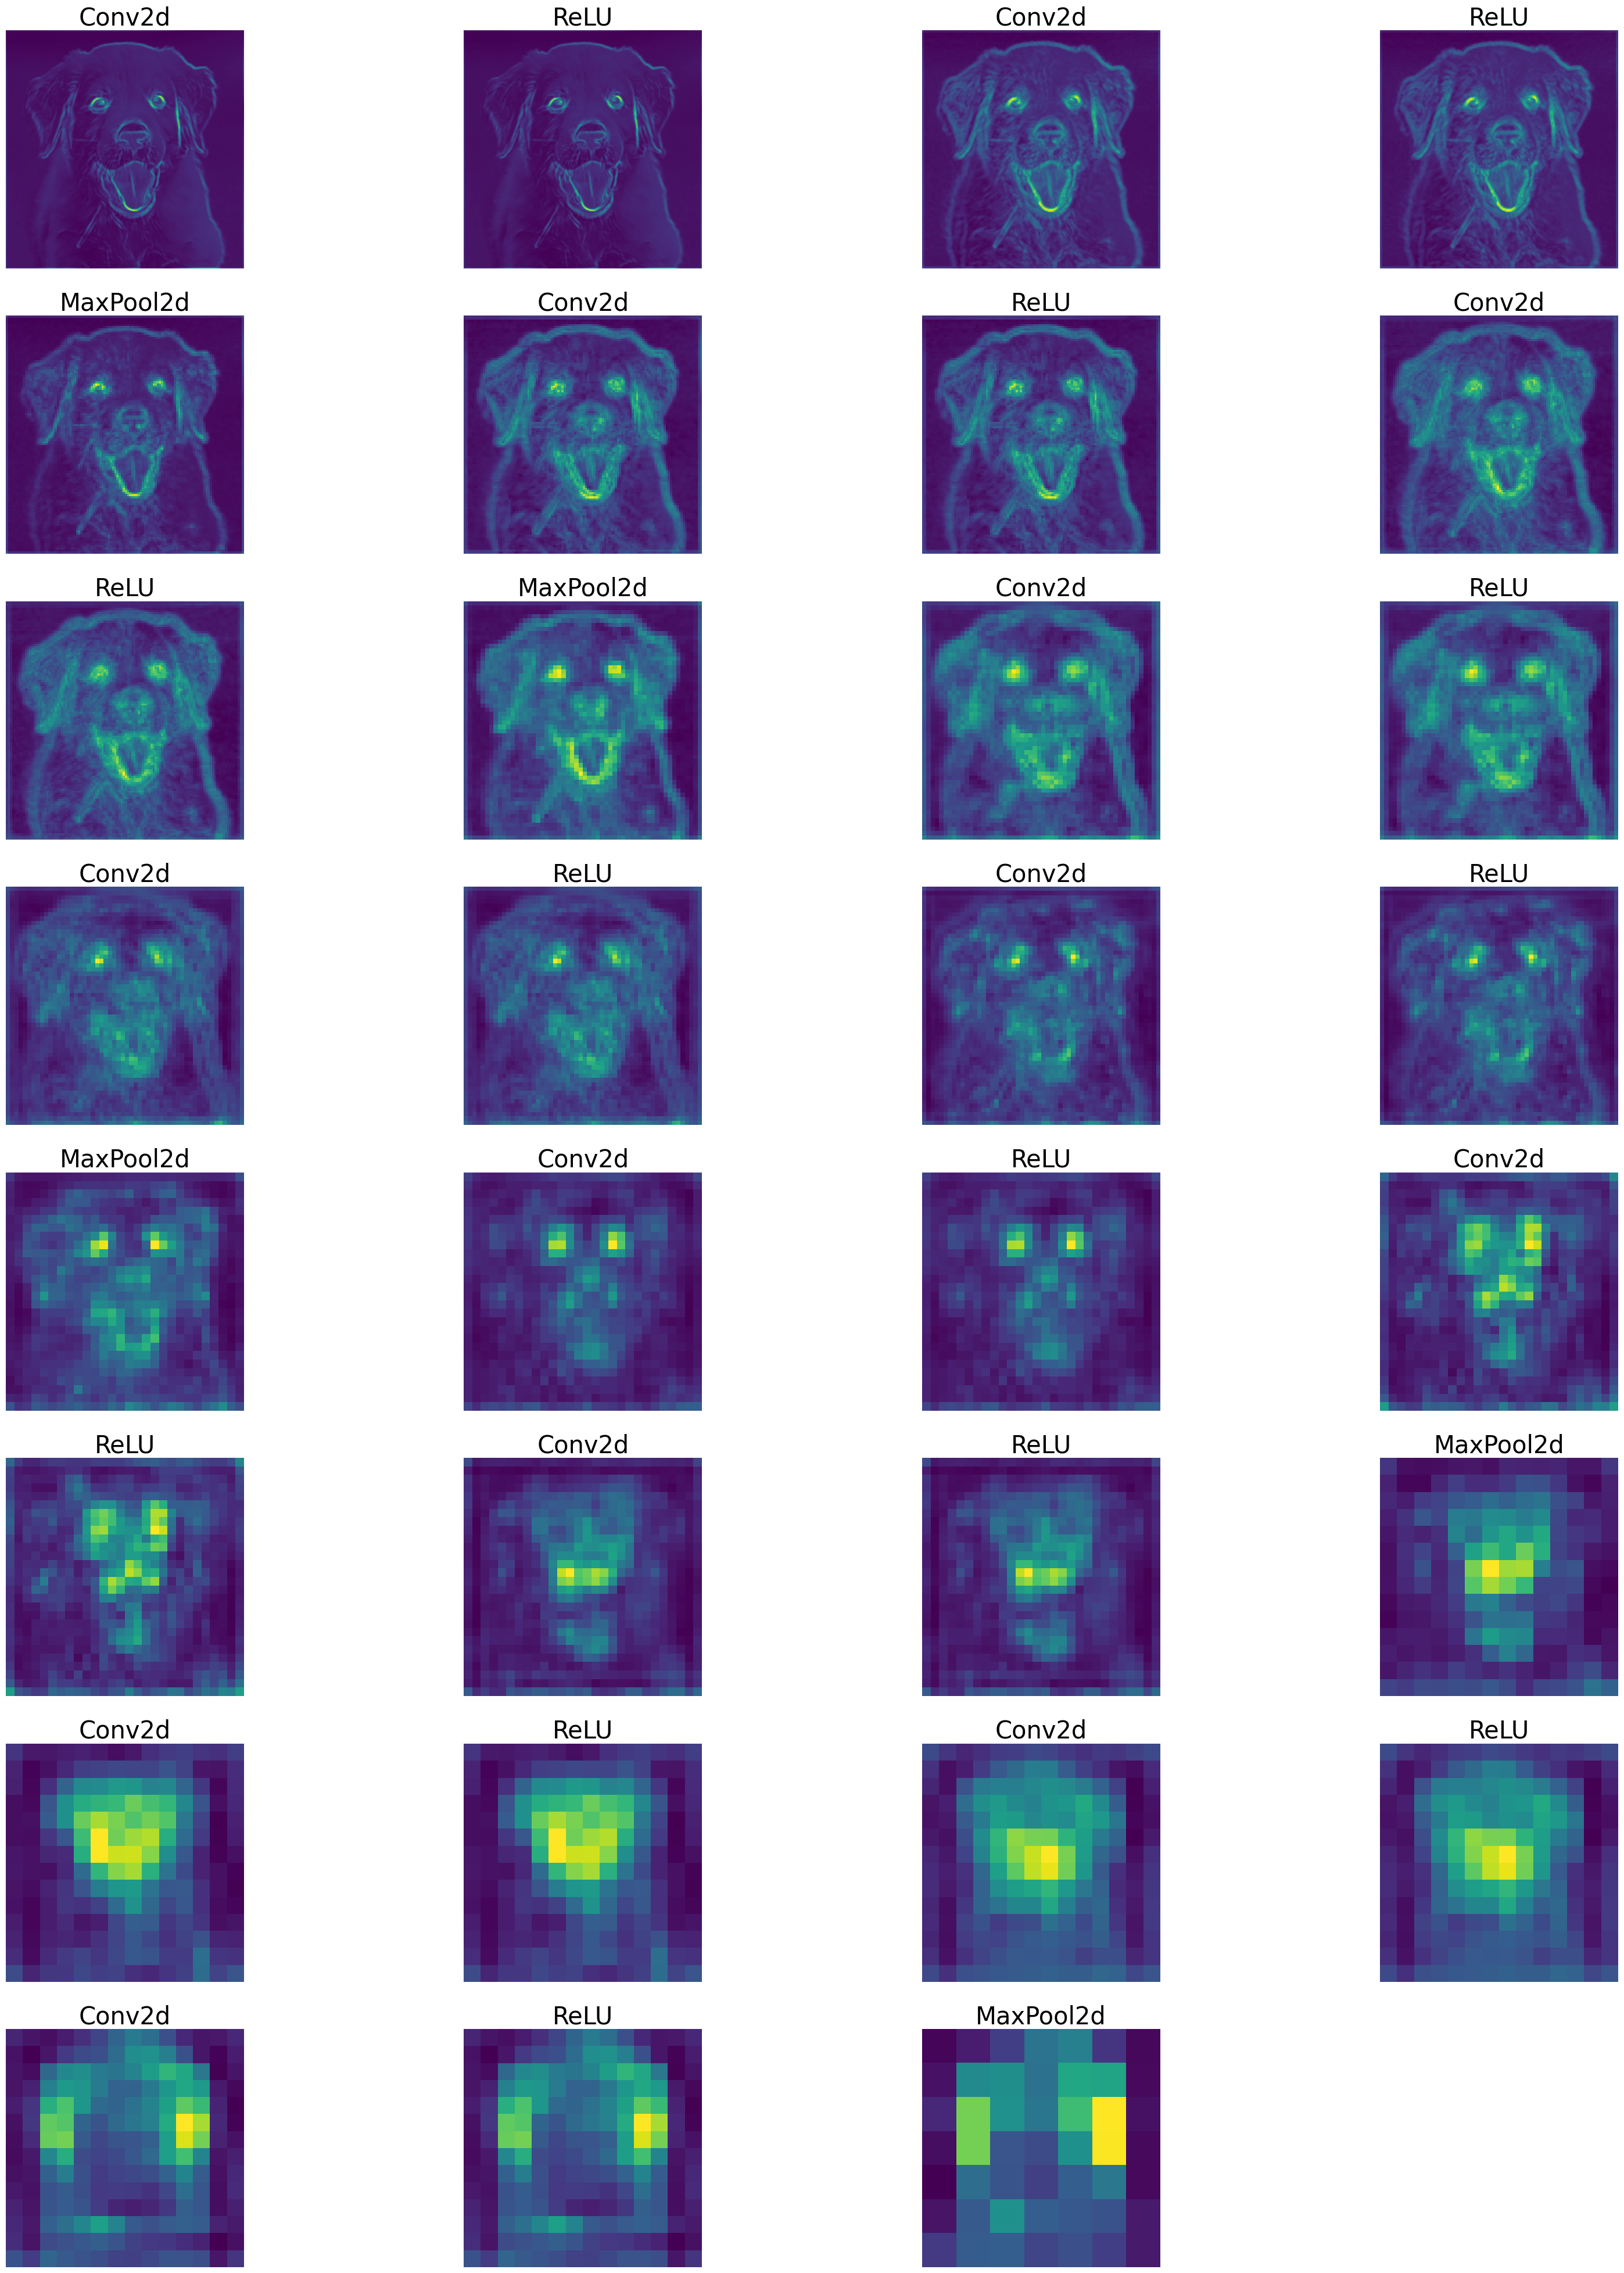

In [ ]:
fig = plt.figure(figsize=(39,50))
for i in range(len(processed)):
  a = fig.add_subplot(8,4,i+1)
  imgplot = plt.imshow(processed[i])
  plt.axis('off')
  a.set_title(names[i].split('(')[0], fontsize=30)

In [9]:
!mv /content/pml/project.zip ..

In [2]:
!cd /content/pml && unzip project.zip

Archive:  source.zip
  inflating: chunker.ipynb           
  inflating: chunker.py              


In [ ]:
!cd /content/pml && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 46.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 50.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [8]:
import os
os.chdir('/content/pml')

In [22]:
from answer import safetynet

In [12]:
import os, sys, argparse, gzip, re, logging
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
import tqdm
import random


In [7]:
!pwd

/content


In [23]:
    opts = {}
    opts['inputfile'] = os.path.join('data', 'input', 'dev.txt')
    opts['trainfile'] = os.path.join('data', 'SafetyNetTrainingData.txt')
    opts['modelfile'] = os.path.join('data', 'chunker')
    opts['modelsuffix'] = '.pt'
    opts['basemodel'] = 'distilbert-base-uncased'
    opts['epochs'] = 5
    opts['batchsize'] = 16
    opts['lr'] = 5e-5
    opts['force'] = False
    opts['logfile'] = None
    print(opts)
    if opts['logfile'] is not None:
        logging.basicConfig(filename=opts['logfile'], filemode='w', level=logging.DEBUG)
    modelfile = opts['modelfile']
    if modelfile.endswith('.pt'):
        modelfile = modelfile.removesuffix('.pt')
    safetynet = safetynet.FinetuneTagger(
                    modelfile,
                    modelsuffix=opts['modelsuffix'],
                    basemodel=opts['basemodel'],
                    trainfile=opts['trainfile'],
                    epochs=opts['epochs'],
                    batchsize=opts['batchsize'],
                    lr=opts['lr']
                )
    if not os.path.isfile(modelfile + opts['modelsuffix']) or opts.force:
        print(f"Could not find modelfile {modelfile + opts['modelsuffix']} or -f used. Starting training.", file=sys.stderr)
        safetynet.train()
        print("Training done.", file=sys.stderr)
    # use the model file if available and opts.force is False
    model_file_path = 'data/chunker_epoch_5.pt'
    assert os.path.isfile(model_file_path), f"Error: missing model file {model_file_path}"
    print(f"Found modelfile {modelfile + opts['modelsuffix']}. Starting decoding.", file=sys.stderr)
    decoder_output = safetynet.decode(opts['inputfile'])
    print("\n\n".join([ "\n".join(output) for output in decoder_output ]))

{'inputfile': 'data/input/dev.txt', 'trainfile': 'data/SafetyNetTrainingData.txt', 'modelfile': 'data/chunker', 'modelsuffix': '.pt', 'basemodel': 'distilbert-base-uncased', 'epochs': 5, 'batchsize': 16, 'lr': 5e-05, 'force': False, 'logfile': None}


Could not find modelfile data/chunker.pt or -f used. Starting training.
100%|██████████| 619/619 [00:26<00:00, 23.67it/s]


Epoch 1/5, Avg Loss: 2.4563


100%|██████████| 619/619 [00:26<00:00, 23.50it/s]


Epoch 2/5, Avg Loss: 1.3226


100%|██████████| 619/619 [00:26<00:00, 23.50it/s]


Epoch 3/5, Avg Loss: 1.0896


100%|██████████| 619/619 [00:26<00:00, 23.54it/s]


Epoch 4/5, Avg Loss: 1.0873


100%|██████████| 619/619 [00:27<00:00, 22.68it/s]


Epoch 5/5, Avg Loss: 1.0866
Model saved to data/chunker_epoch_5.pt


Training done.
Found modelfile data/chunker.pt. Starting decoding.
100%|██████████| 50/50 [00:00<00:00, 109.43it/s]

Predictions successfully written to predictions.txt.
N

N

N

N

V

V

V

N

N

N

V

V

N

V

V

V

V

N

N

V

N

A

V

V

V

A

V

V

A

N

V

V

N

A

N

V

V

V

V

N

V

V

N

V

N

V

V

N

A

V
